In [427]:
### in this task missing values *should be imputed* with the mean value of the column
### impute missing values only in columns required for solutions

In [428]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (8, 4)})

#%matplotlib inline
#import matplotlib_inline
#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import seaborn as sns
sns.set()

In [429]:
df = pd.read_csv("amazon_books_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        946 non-null    object 
 1   author       824 non-null    object 
 2   price        944 non-null    float64
 3   pages        934 non-null    float64
 4   avg_reviews  823 non-null    float64
 5   n_reviews    946 non-null    int64  
 6   dimensions   914 non-null    object 
 7   weight       943 non-null    object 
 8   language     943 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 66.6+ KB


#### Question 1

In [430]:
### decide what data type each column is: numerical-discrete, numerical-continuous, categorical-nominal, categorical-ordinal
### consider only [price, pages, avg_reviews, n_reviews, language] for this analysis
### no need to add explanations, just the final answer

#### Question 1 - solution

In [431]:
answer = {"data": ["price", "pages", "avg_reviews", "n_reviews", "language"], "type" : ["numerical-continuous","numerical-discrete"
    ,"categorical-ordinal","numerical-discrete","categorical-nominal"]}
pd.DataFrame(answer)

,data,type
0,price,numerical-continuous
1,pages,numerical-discrete
2,avg_reviews,categorical-ordinal
3,n_reviews,numerical-discrete
4,language,categorical-nominal


#### Question 2

In [432]:
### plot a histogram of books' number of pages using 50 bins
### decide if the distribution is symmetric, skewed positive or skewed negative
### use both the histogram and required computations for this decision

#### Question 2 - solution

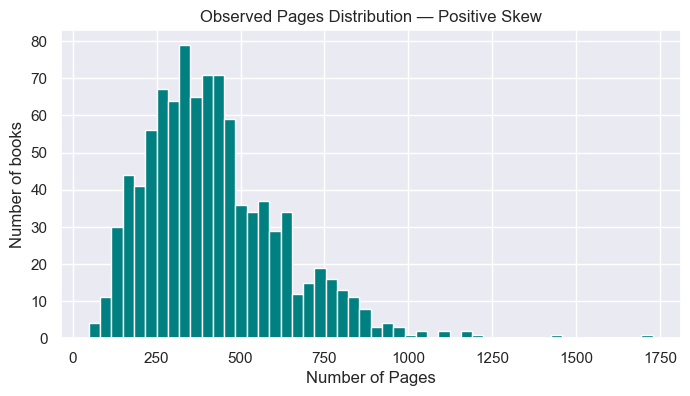

In [433]:
df["pages"] = df["pages"].fillna(df["pages"].mean())
df["pages"].plot(kind = "hist",bins = 50,color = "teal")
plt.title("Observed Pages Distribution — Positive Skew")
plt.ylabel("Number of books")
plt.xlabel("Number of Pages")
plt.show()

#### Question 3

In [434]:
### inspect the 'weight' column carefully
### plot a histogram of books' weight using 50 bins
### decide if the distribution is symmetric, skewed positive or skewed negative
### use both the histogram and required computations for this decision

#### Question 3 - solution

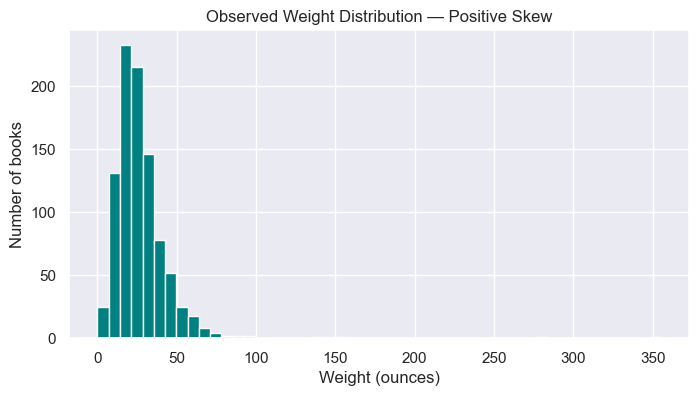

In [435]:
def convert_to_ounces(weight:str):
    if pd.isna(weight):
        return None
    weight_str = weight.split()
    if len(weight_str) != 2:
        return None
    try:
        if weight_str[1] == "ounces":
            return float(weight_str[0])
        elif weight_str[1] == "pounds":
            return float(weight_str[0])*16
        else:
            return None
    except ValueError:
        return None

weight_ounces = df["weight"].apply(convert_to_ounces)
weight_ounces.fillna(weight_ounces.mean(), inplace=True)
weight_ounces.plot(kind = "hist",bins = 50,color = "teal")
plt.title("Observed Weight Distribution — Positive Skew")
plt.ylabel("Number of books")
plt.xlabel("Weight (ounces)")
plt.show()



#### Question 4

In [436]:
### compute Pearson's correlation between a book's volume (inferred by its dimensions) and price in the data
### (you can use the built-in Series.corr() function for that purpose)

#### Question 4 – solution

In [437]:
def get_volume(dimensions:str):
    if pd.isna(dimensions):
        return None
    dimensions_str = dimensions.split(" x ")
    if len(dimensions_str) != 3:
        return None
    dimensions_str[-1] = dimensions_str[-1].replace(" inches", "")
    try:
        dimensions_float = [float(dimension) for dimension in dimensions_str]
    except ValueError:
        return None
    return dimensions_float[0] * dimensions_float[1] * dimensions_float[2]

books_volumes_and_price = pd.DataFrame({"volume" : df["dimensions"].apply(get_volume), "price" : df["price"]}, columns=["volume", "price"])
books_volumes_and_price["volume"] = books_volumes_and_price["volume"].fillna(books_volumes_and_price["volume"].mean())
books_volumes_and_price["price"] = books_volumes_and_price["price"].fillna(books_volumes_and_price["price"].mean())
books_volumes_and_price.corr()

,volume,price
volume,1.00000,0.41851
price,0.41851,1.00000


#### Question 5

In [438]:
### show a scatter plot of a book's volume (inferred by its dimensions) and price
### do the results fit the score you got in the previous cell? (no need to print answer to this question)

#### Question 5 — solution

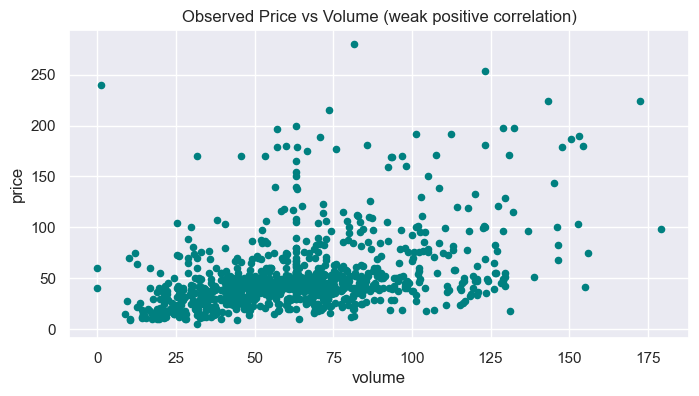

In [439]:
books_volumes_and_price.plot(x= "volume", y = "price", kind = "scatter",color = "teal")
plt.title("Observed Price vs Volume (weak positive correlation)")
plt.show()

#### Question 6

In [440]:
### inspect book titles carefully: they can be roughly split by keyphrases:
### ['data science', 'data analytics', 'data engineering', 'machine learning', 'statistics', 
### 'deep learning', 'natural language processing']

### a book belongs to one of the above categories if its name contains the corresponding keyphrase
### display the number of books that fall into each category and their total, in the same table
### some books may not belong to any of the listed above categories
### category match should be case insensitive

#### Question 6 — solution

In [441]:
keyphrases = ['data science', 'data analytics', 'data engineering', 'machine learning', 'statistics', 'deep learning', 'natural language processing']

lower_titles = df['title'].str.lower()
count_category = {phrase: lower_titles.str.contains(phrase).sum() for phrase in keyphrases}

count_category['total'] = sum(count_category.values())

category_df = pd.DataFrame.from_dict(count_category,orient ='index', columns=['count'] )
category_df.index.names = ['category']

pd.DataFrame(category_df)




,count
category,
data science,111
data analytics,28
data engineering,7
machine learning,179
statistics,128
deep learning,138
natural language processing,13
total,604


#### Question 7

In [442]:
### display the same result where the dataframe is sorted by the number of books, descending
### no need to display the total amount in this result - drop it

#### Question 7 — solution

In [443]:
new_category_df = category_df[category_df.index != 'total']
new_category_df = new_category_df.sort_values(by = 'count', ascending = False)
pd.DataFrame(new_category_df)

,count
category,
machine learning,179
deep learning,138
statistics,128
data science,111
data analytics,28
natural language processing,13
data engineering,7


#### Question 8

In [444]:
### sample 10000 values from N~(50, 10)
### for this pirpose use https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

### what portion of the distribution is found in the range (42.5, 57.5)? -- calculate using z table
### (recall the NormalDist().cdf() function we used at the lecture)

### what portion of the distribution is found in the range (42.5, 57.5)? -- compute empirically using the sampled values
### report both values (calculated and empirical)

#### Question 8 — solution

In [445]:
import numpy as np
from statistics import NormalDist

samples = np.random.normal(50,10, 10000)
z_low = (42.5 - 50)/10
z_high = (57.5 - 50)/10

theoretical_portion = NormalDist().cdf(z_high) - NormalDist().cdf(z_low)
empirical_portion = ((samples > 42.5) & (samples < 57.5)).mean()

result = [('theoretical portion', theoretical_portion), ('empirical_portion', empirical_portion)]
pd.DataFrame(result)




,0,1
0,theoretical portion,0.546745
1,empirical_portion,0.548000


#### Question 9

In [446]:
### compute confidence interval of 90% for the true population mean of a book price on Amazon
### report left and right boundaries

#### Question 9 — solution

In [447]:
def confidence_interval(data, alpha):
    mean, std, n = data.mean(), data.std(), len(data)
    z = NormalDist().inv_cdf(1-alpha/2.0)
    left = mean - z*std/(n**0.5) 
    right = mean + z*std/(n**0.5) 
    return left, right

price_data = df["price"].fillna(df["price"].mean())

left, right = confidence_interval(price_data, 0.10)

result = [('right', round(right,2)), ('left', round(left,2))]
pd.DataFrame(result)

,0,1
0,right,54.06
1,left,50.15


#### Question 10

In [448]:
### can one say with 85% confidence that the true population mean of a book price resides within the [49.0, 54.0] interval?
### show your computations, and print your answer: yes or no

#### Question 10 — solution

In [449]:
new_left, new_right = confidence_interval(price_data, 0.15)
is_within = 49.0 >= left and 54.0 <= right
answer = "yes" if is_within else "no"

result = [('answer:', answer)]
pd.DataFrame(result)

,0,1
0,answer:,no
